# import Libriaries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


# Reading the data

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']],
                               keep_date_col=True))
    return pd.concat(dfs, ignore_index=True)
        
week_nums = [211002, 210925, 210918, 210911, 210904,
210828, 210821, 210814, 210807, 210731, 210724, 210717]
turnstiles_df = get_data_parse_dt(week_nums)

In [3]:
# # turnstiles_df.to_csv ('turnstiles.csv', index = False, header=True)
# date_parser=lambda x: datetime.strptime(turnstiles_df['DATE_TIME'], "%Y-%d-%m %H:%M:%S")
# turnstiles_df = pd.read_csv('turnstiles.csv',parse_dates =['DATE_TIME'], date_parser=date_parser)
# # Clean columns 


In [12]:
turnstiles_df.columns = [x.strip() for x in turnstiles_df.columns]

In [15]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [16]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["DESC"], axis=1, errors="ignore")

In [18]:
turnstiles_daily_entries = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_exits = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .EXITS.first())

In [ ]:
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

In [83]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

df["DAILY_ENTRIES"] = df.apply(df, axis=1, max_counter=1000000)

NameError: name 'turnstiles_daily' is not defined

In [19]:
turnstiles_daily_entries['DIFF_ENTRIES'] = (turnstiles_daily_entries
                                            .ENTRIES.diff()).fillna(0)
turnstiles_daily_exits['DIFF_EXIT'] = (turnstiles_daily_exits.EXITS.diff()).fillna(0)

In [20]:
turnstiles_daily_entries

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,DIFF_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-10 00:00:00,7600000,0.0
1,A002,R051,02-00-00,59 ST,2021-07-10 04:00:00,7600008,8.0
2,A002,R051,02-00-00,59 ST,2021-07-10 08:00:00,7600014,6.0
3,A002,R051,02-00-00,59 ST,2021-07-10 12:00:00,7600061,47.0
4,A002,R051,02-00-00,59 ST,2021-07-10 16:00:00,7600150,89.0
...,...,...,...,...,...,...,...
2514959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,0.0
2514960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,0.0
2514961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,0.0
2514962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,0.0


In [21]:
turnstiles_daily_exits

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS,DIFF_EXIT
0,A002,R051,02-00-00,59 ST,2021-07-10 00:00:00,2598659,0.0
1,A002,R051,02-00-00,59 ST,2021-07-10 04:00:00,2598664,5.0
2,A002,R051,02-00-00,59 ST,2021-07-10 08:00:00,2598679,15.0
3,A002,R051,02-00-00,59 ST,2021-07-10 12:00:00,2598732,53.0
4,A002,R051,02-00-00,59 ST,2021-07-10 16:00:00,2598761,29.0
...,...,...,...,...,...,...,...
2514959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,649,0.0
2514960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,649,0.0
2514961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,649,0.0
2514962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,649,0.0


In [75]:
df = turnstiles_daily_entries.merge(turnstiles_daily_exits,
                                   how = 'inner',
                                   on=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])

In [82]:
df.DIFF_ENTRIES.max()

2146984416.0

In [77]:
msk1 = (
(df['C/A'] == 'A002') &
(df['UNIT'] == 'R051') &
(df['SCP'] == '02-00-00') &
(df['STATION'] == '59 ST') 
)

In [80]:
df['EXITS'].max()

2133796536

In [72]:
df['WEEK'] = pd.DatetimeIndex(df['DATE_TIME']).week
df

<ipython-input-72-148bb3c1ca70>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WEEK'] = pd.DatetimeIndex(df['DATE_TIME']).week


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,DIFF_ENTRIES,EXITS,DIFF_EXIT,WEEK
0,A002,R051,02-00-00,59 ST,2021-07-10 00:00:00,7600000,0.0,2598659,0.0,27
1,A002,R051,02-00-00,59 ST,2021-07-10 04:00:00,7600008,8.0,2598664,5.0,27
2,A002,R051,02-00-00,59 ST,2021-07-10 08:00:00,7600014,6.0,2598679,15.0,27
3,A002,R051,02-00-00,59 ST,2021-07-10 12:00:00,7600061,47.0,2598732,53.0,27
4,A002,R051,02-00-00,59 ST,2021-07-10 16:00:00,7600150,89.0,2598761,29.0,27
...,...,...,...,...,...,...,...,...,...,...
2514959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 05:00:00,5554,0.0,649,0.0,39
2514960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 09:00:00,5554,0.0,649,0.0,39
2514961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 13:00:00,5554,0.0,649,0.0,39
2514962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01 17:00:00,5554,0.0,649,0.0,39


In [74]:
x = df.groupby(df['WEEK']).sum()
x

,ENTRIES,DIFF_ENTRIES,EXITS,DIFF_EXIT
WEEK,,,,
27,2486678787463,1.418180e+09,1980375576973,-2.055838e+09
28,8723603604854,-1.525327e+08,6945014977919,7.954301e+06
29,8696453187299,-1.861969e+07,6955147255447,4.821471e+06
30,8668831193962,-9.280473e+07,6935971887715,1.069667e+07
31,8728450661760,-1.280450e+07,6948517110126,7.212500e+05
32,8623907833316,-2.085180e+09,6878962109478,-1.501422e+09
33,8638094945957,-2.120346e+07,6895246094936,-2.111378e+07
34,8595945411319,1.805415e+08,6897814193429,8.490941e+08
35,8626311539541,-9.994605e+06,6921861043133,-2.143714e+06


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514964 entries, 0 to 2514963
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   C/A           object        
 1   UNIT          object        
 2   SCP           object        
 3   STATION       object        
 4   DATE_TIME     datetime64[ns]
 5   ENTRIES       int64         
 6   DIFF_ENTRIES  float64       
 7   EXITS         int64         
 8   DIFF_EXIT     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 191.9+ MB


In [61]:
x = df.groupby(df[msk1]['DATE_TIME']).sum()

x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2021-07-10 00:00:00 to 2021-10-01 20:00:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENTRIES       504 non-null    int64  
 1   DIFF_ENTRIES  504 non-null    float64
 2   EXITS         504 non-null    int64  
 3   DIFF_EXIT     504 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 19.7 KB


In [63]:
x.t

TypeError: unsupported Type DatetimeIndex

In [49]:
pd.to_datetime(df[msk1]['DATE_TIME'])

0     2021-07-10 00:00:00
1     2021-07-10 04:00:00
2     2021-07-10 08:00:00
3     2021-07-10 12:00:00
4     2021-07-10 16:00:00
              ...        
499   2021-10-01 04:00:00
500   2021-10-01 08:00:00
501   2021-10-01 12:00:00
502   2021-10-01 16:00:00
503   2021-10-01 20:00:00
Name: DATE_TIME, Length: 504, dtype: datetime64[ns]

AttributeError: 'Series' object has no attribute 'week'

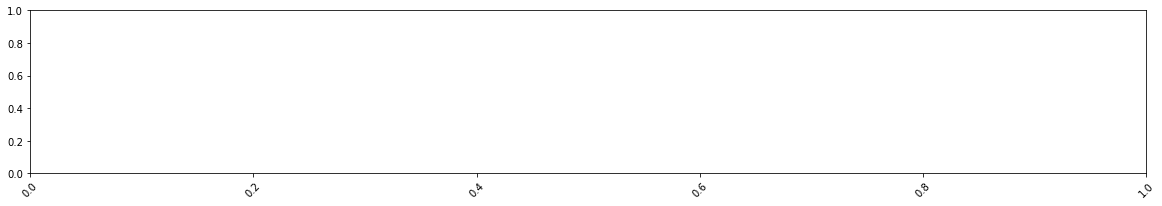

In [30]:
# plt.plot(x= 'DATE_TIME', y = 'DIFF_ENTRIES', data=df[msk1])
plt.figure(figsize=(20,3))
plt.xticks(rotation = 45)
plt.plot(df[msk1]['DATE_TIME'],df[msk1]['DIFF_ENTRIES'])